In [1]:
pip install deepface

In [2]:
pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


In [104]:
img1 = "src/hitoshi01.jpg"
img2 = "src/hitoshi02.jpg"

In [105]:
from deepface import DeepFace

objs1 = DeepFace.analyze(img1, actions = ['age', 'gender', 'race', 'emotion'])
objs2 = DeepFace.analyze(img2, actions = ['age', 'gender', 'race', 'emotion'])

age1 = objs1[0]['age']
gender1 = objs1[0]['dominant_gender']
race1 = objs1[0]['dominant_race']
emotion1 = objs1[0]['dominant_emotion']
age2 = objs2[0]['age']
gender2 = objs2[0]['dominant_gender']
race2 = objs2[0]['dominant_race']
emotion2 = objs2[0]['dominant_emotion']

print(f"推定年齢: {age1}歳")
print(f"性別: {gender1}")
print(f"人種: {race1}")
print(f"感情: {emotion1}")

print("--------------")

print(f"推定年齢: {age2}歳")
print(f"性別: {gender2}")
print(f"人種: {race2}")
print(f"感情: {emotion2}")

Action: emotion: 100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.61it/s]

推定年齢: 35歳
性別: Man
人種: asian
感情: neutral
--------------
推定年齢: 41歳
性別: Man
人種: asian
感情: neutral


In [77]:
result = DeepFace.verify(img1, img2)
print(result['distance']);
print("---------------------")
if result['verified']:
    print("同一人物です")
else:
    print("同一人物ではありません")

0.5377400148962973
---------------------
同一人物です


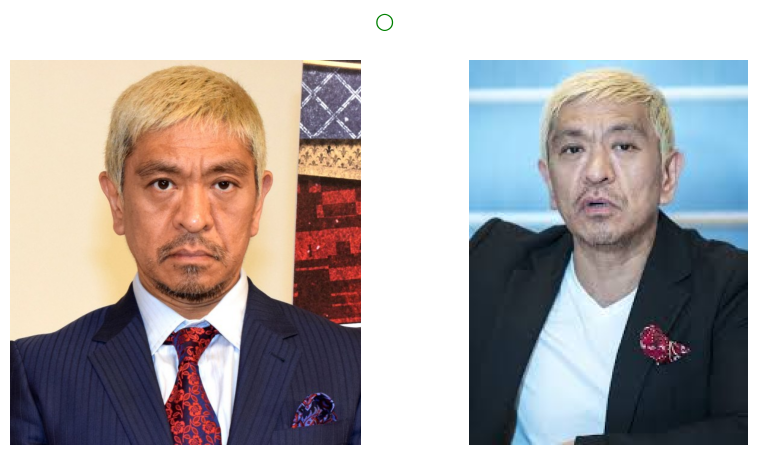

In [106]:
# 同一人物判定

from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2

# 画像のパスを指定
img1_path = "src/hitoshi01.jpg"
img2_path = "src/hitoshi02.jpg"

# DeepFaceを使って画像を比較
result = DeepFace.verify(img1_path=img1_path, img2_path=img2_path)

# 画像を読み込む
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# OpenCVはBGR形式で画像を読み込むため、RGB形式に変換
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# 画像を表示
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis('off')

# 判定結果に応じて○や×を表示
if result['verified']:
    verification_result = "\u25CB"  # 緑の○（Unicode: \u25CB）
    title_color = 'green'
else:
    verification_result = "\u2716"  # 赤の×（Unicode: \u2716）
    title_color = 'red'

# 判定結果を表示
plt.suptitle(verification_result, fontsize=16, color=title_color)
plt.show()